In [1]:
from importlib import reload
import config
reload(config)
import os

import torch
from torch import nn
from torch.utils.data import DataLoader

# %load_ext tensorboard

import dataset, model, trainer
import numpy as np
import util

{3: -0.39909242329982053, 4: -0.19738988344621344, 5: 2, 6: 0.09254130667649196, 7: -0.24982412608999893, 8: 0.4709456394072321, 9: -0.3411914433591614, 10: -0.3828979411145257, 11: -0.11695083984792853, 12: 0.0682534906104365, 13: 0.4305003948669701, 14: -0.0894695488566325, 15: -0.4022184293650629, 16: -0.0671844559939494, 17: 0.07459801082273698, 18: 0.03637438704724316, 19: 0.4241059011801368, 20: -0.060708947196815743}


D:\Github\smlm-dl\smlm_dl\dataset.py:220: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


34:	 [x = -9.292,], [y = 5.855,], [z = 8.470,], [A = 778.857,], [bg = 98.708,],
60:	 [x = 3.589,], [y = 2.452,], [z = 8.650,], [A = 1310.137,], [bg = 94.753,],
91:	 [x = -9.970,], [y = 4.909,], [z = -2.261,], [A = 1327.833,], [bg = 56.533,],
64:	 [x = 4.871,], [y = -0.890,], [z = 6.366,], [A = 1158.388,], [bg = 98.040,],
67:	 [x = 2.859,], [y = -10.037,], [z = 1.241,], [A = 1738.871,], [bg = 46.681,],
21:	 [x = 6.387,], [y = 7.194,], [z = -5.126,], [A = 738.166,], [bg = 32.682,],
104:	 [x = -3.100,], [y = -10.097,], [z = -3.616,], [A = 567.203,], [bg = 6.623,],
9:	 [x = -7.080,], [y = -1.848,], [z = -3.326,], [A = 1854.876,], [bg = 39.123,],
43:	 [x = -4.055,], [y = -7.519,], [z = 6.669,], [A = 1276.398,], [bg = 7.317,],
127:	 [x = -1.178,], [y = -10.151,], [z = -7.984,], [A = 907.548,], [bg = 12.312,],
16:	 [x = -0.561,], [y = 8.545,], [z = -0.705,], [A = 749.648,], [bg = 54.363,],
110:	 [x = 2.570,], [y = 2.074,], [z = 3.537,], [A = 823.301,], [bg = 39.839,],
49:	 [x = -3.390,], [y =

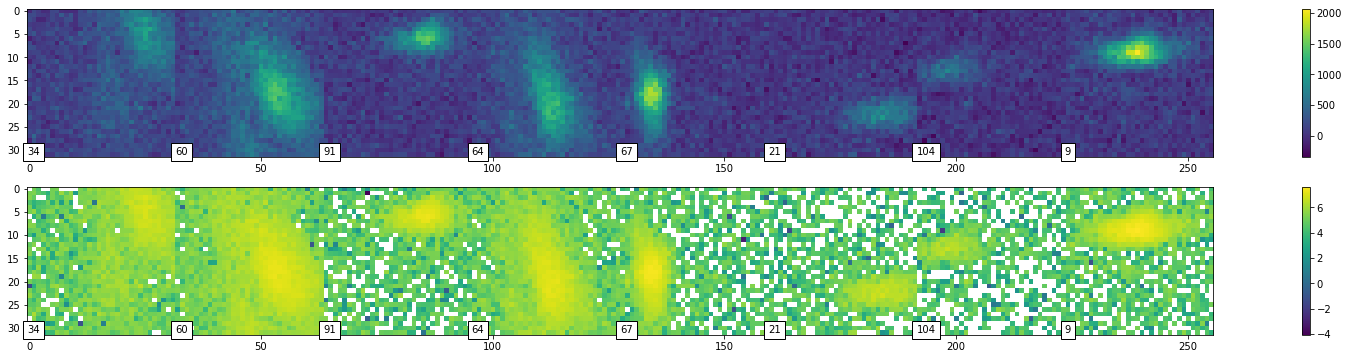

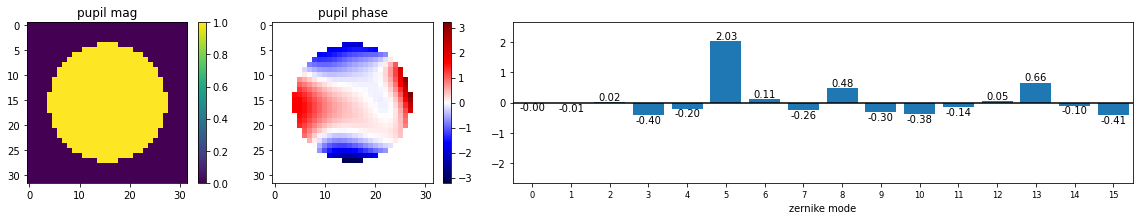

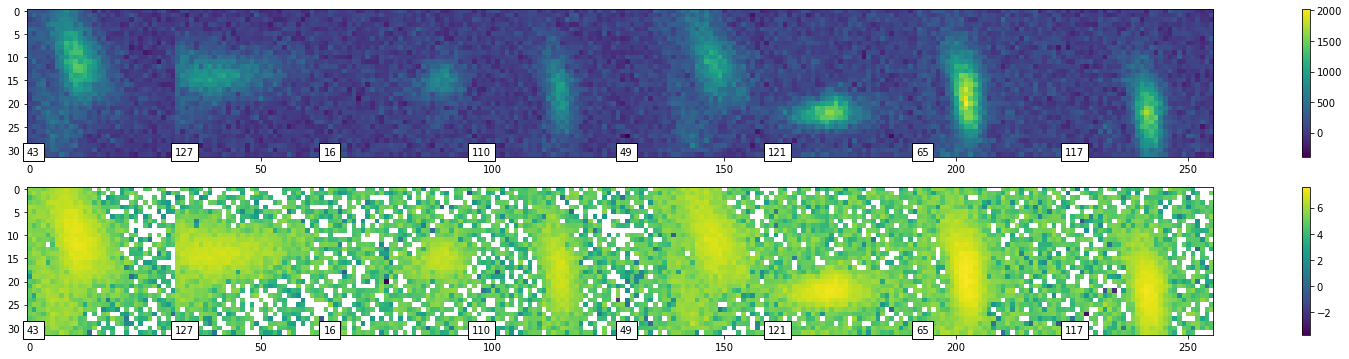

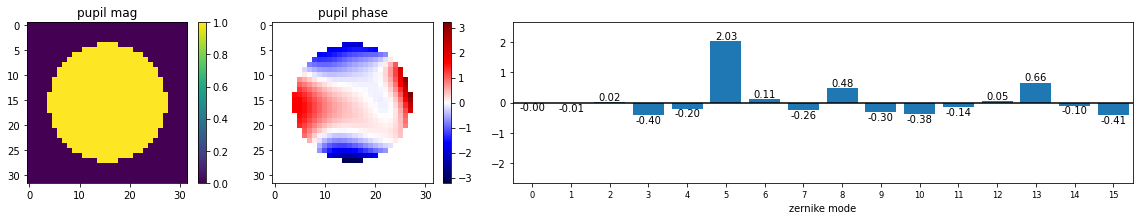

In [2]:
reload(dataset)

psf_zerns = dict()
for z in range(3, 21):
    psf_zerns[z] = np.random.uniform(-0.5, 0.5)
psf_zerns.update({5:2 })

print(psf_zerns)

settings = {
    # 'out_size': (64,64),
    'length': (128, 1),
    'dropout_p': 0,
    'psf_zerns': psf_zerns,
    # 'noise_params': {},
    'normalize': False,
    'padding': (4,4),
    'random_z': True,
    "augmentations":{},
    # "augmentations":{"pixel shift":(4,4), }#"add noise":0.1},
}

# training_data = dataset.FourierOptics2DPSFDataset(**settings)
# training_data = dataset.Gaussian2DPSFDataset(**settings)
training_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(training_data)
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)


# valid_data = dataset.FourierOptics2DPSFDataset(**settings)
# valid_data = dataset.Gaussian2DPSFDataset(**settings)
valid_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(valid_data)
valid_dataloader = DataLoader(valid_data, batch_size=64, shuffle=True)

C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\cuda\__init__.py:80: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-07_20-32-49_DESKTOP-7NNT713\model.ptm
Starting training Epoch # 0
Epoch # 0, Batch # 1 (128/128), loss = 130531.484375
Starting training Epoch # 1
Epoch # 1, Batch # 1 (128/128), loss = 132161.578125
****************************************************************************************************
Validation, average loss = 97688.984375
****************************************************************************************************
Saved to : D:\Pytorch\runs\2021-12-07_20-32-49_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder.encoders.conv_layer1.0.weight', 'enc

D:\Github\smlm-dl\smlm_dl\model.py:660: RuntimeWarning: invalid value encountered in log10
  im = axes[0, i].imshow(np.log10(img[0]))


D:\Pytorch\runs\2021-12-07_20-32-49_DESKTOP-7NNT713
No training data supplied. Remember to set prior to training.
No validation data supplied. Remember to set prior to training.
CUDA not available. Defaulting to CPU
Device: cpu
Loaded from D:\Pytorch\runs\2021-12-07_20-32-49_DESKTOP-7NNT713\model.ptm, last modified: Tue Dec  7 20:32:49 2021
Layer (type:depth-idx)                   Param #
Gaussian2DModel                          --
├─Gaussian2DRenderer: 1-1                --
├─EncoderModel: 1-2                      --
│    └─ModuleDict: 2-1                   --
│    │    └─Sequential: 3-1              2,514
│    │    └─Sequential: 3-2              13,984
│    │    └─Sequential: 3-3              55,616
│    └─ModuleDict: 2-2                   --
│    └─ModuleDict: 2-3                   --
│    │    └─Sequential: 3-4              221,824
│    │    └─Sequential: 3-5              131,392
│    └─ModuleDict: 2-4                   --
│    │    └─Conv2d: 3-6                  325
Total params: 

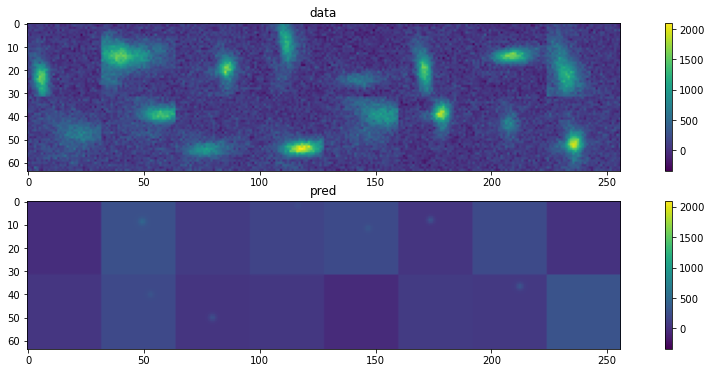

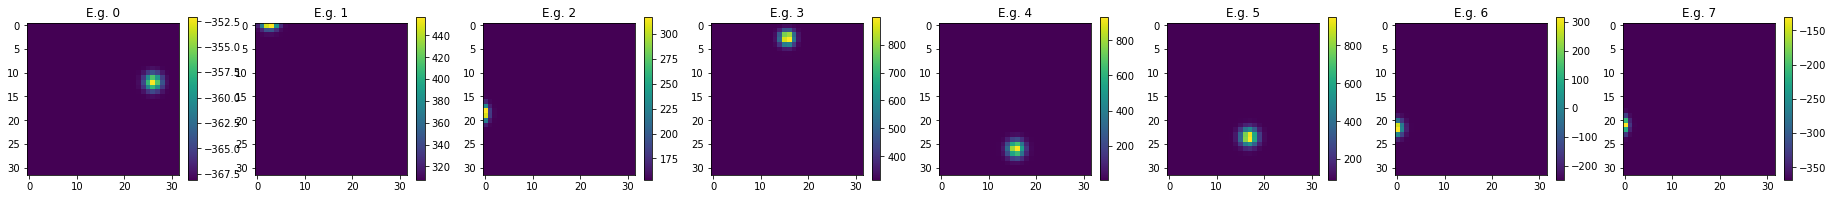

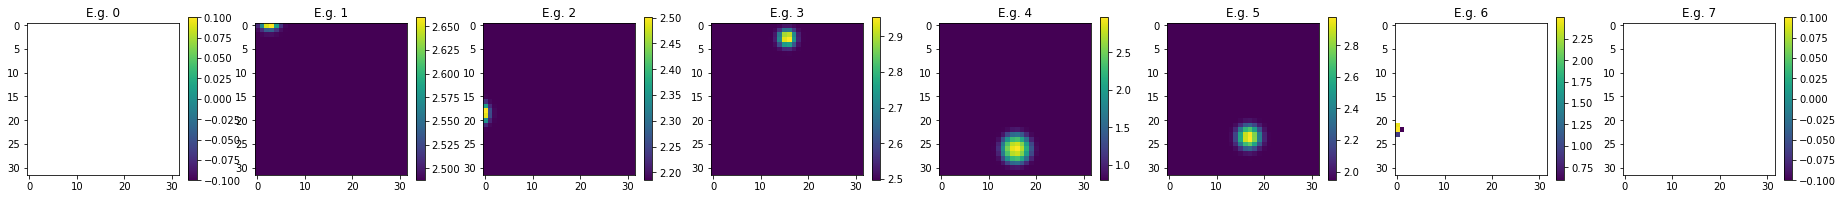

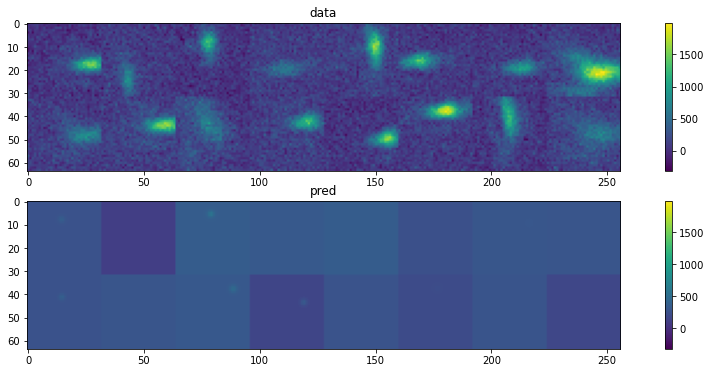

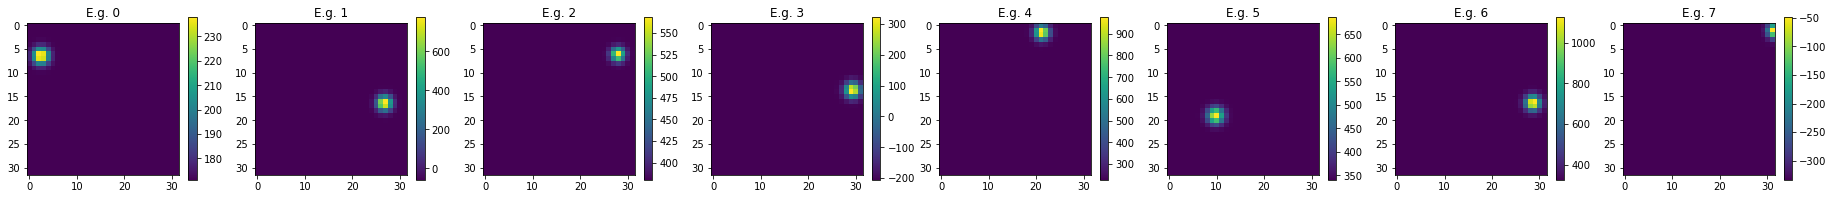

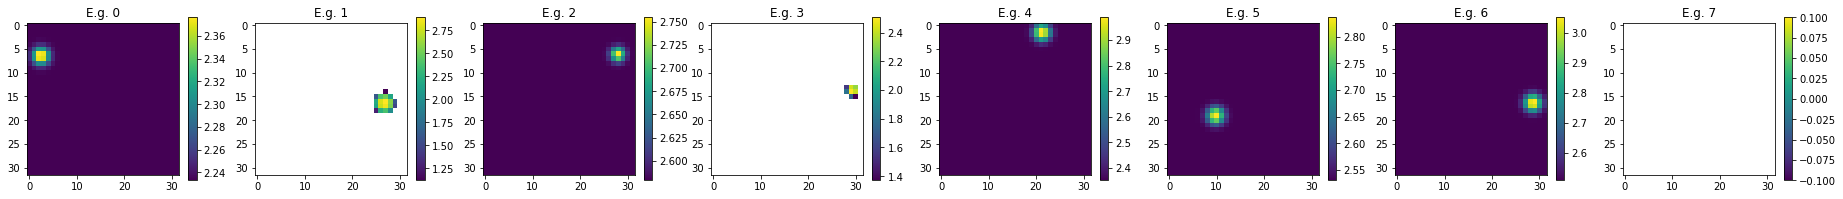

In [3]:
reload(trainer)
fitting_model = model.Gaussian2DModel(fit_params=['x','y','sig', 'A', 'bg'])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2,)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, label="test")
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-07_20-32-59_DESKTOP-7NNT713\model.ptm
Starting training Epoch # 0


C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\autograd\__init__.py:154: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ..\aten\src\ATen\native\Copy.cpp:244.)
  Variable._execution_engine.run_backward(


Epoch # 0, Batch # 1 (128/128), loss = 156460.937500
Starting training Epoch # 1
Epoch # 1, Batch # 1 (128/128), loss = 115171.843750
****************************************************************************************************
Validation, average loss = 98772.140625
****************************************************************************************************
Saved to : D:\Pytorch\runs\2021-12-07_20-32-59_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.1.weight', 'encoder.encoders

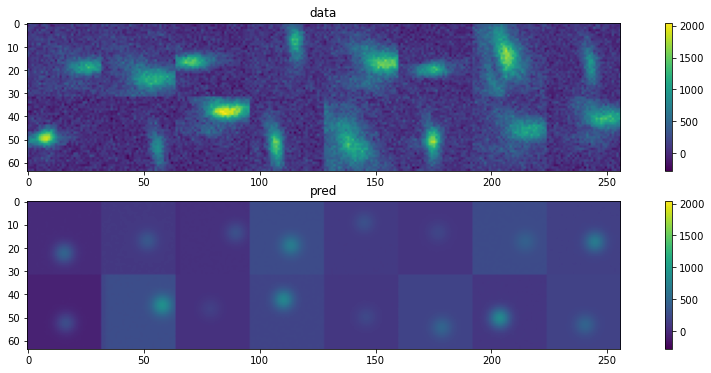

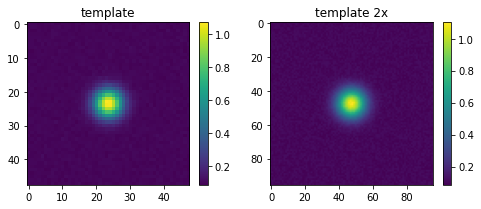

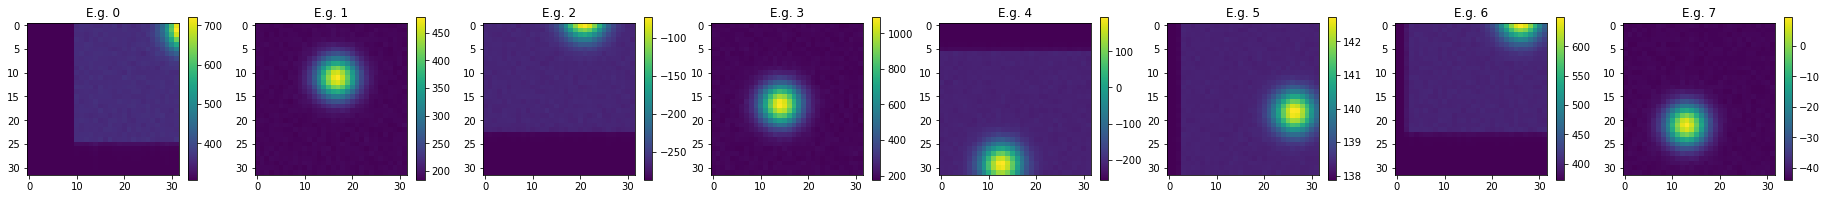

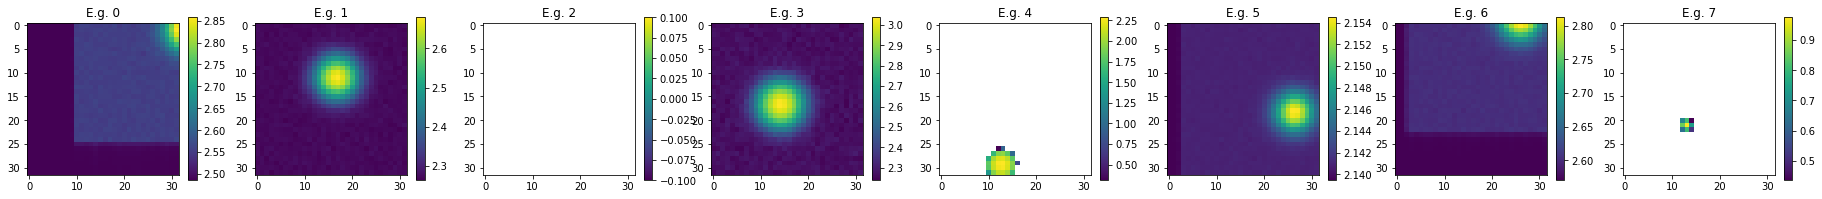

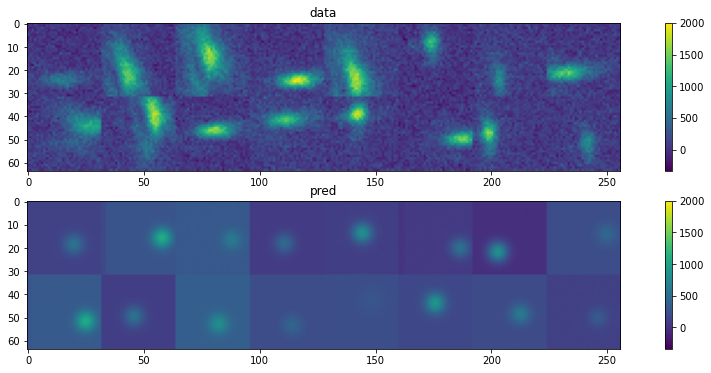

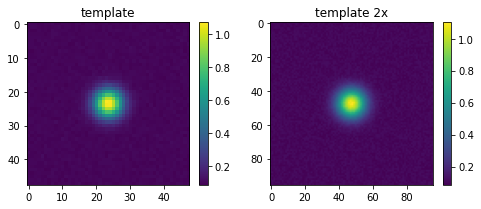

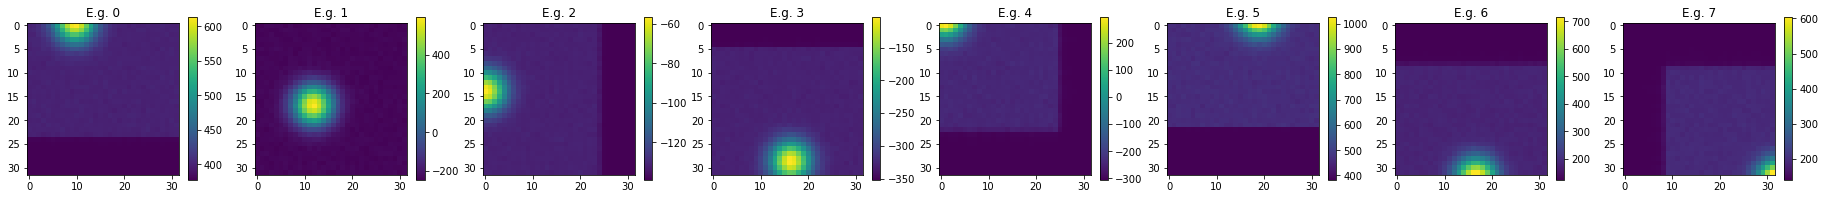

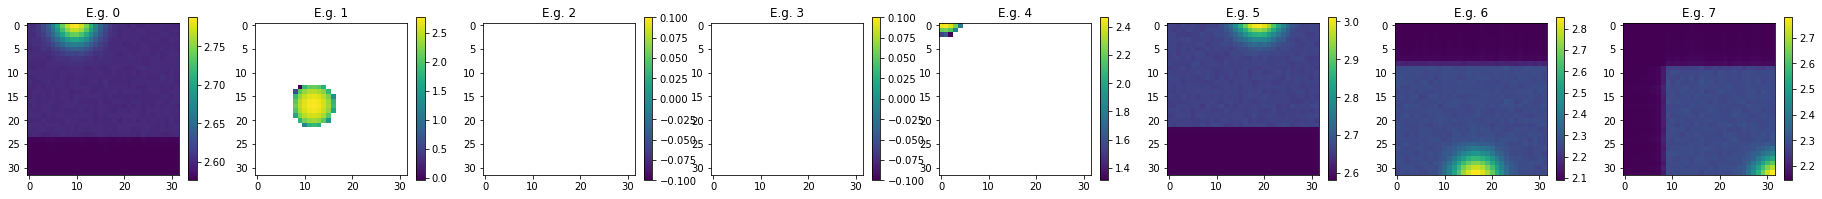

In [4]:
reload(trainer)
fitting_model = model.Template2DModel(fit_params=['x','y','A','bg'],                                      
                                      template_padding=(8,8),
                                     )
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-07_20-33-13_DESKTOP-7NNT713\model.ptm
Starting training Epoch # 0
Epoch # 0, Batch # 1 (128/128), loss = 134868.281250
Starting training Epoch # 1
Epoch # 1, Batch # 1 (128/128), loss = 139645.968750
****************************************************************************************************
Validation, average loss = 127805.179688
****************************************************************************************************
Saved to : D:\Pytorch\runs\2021-12-07_20-33-13_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.pupil_phase.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder

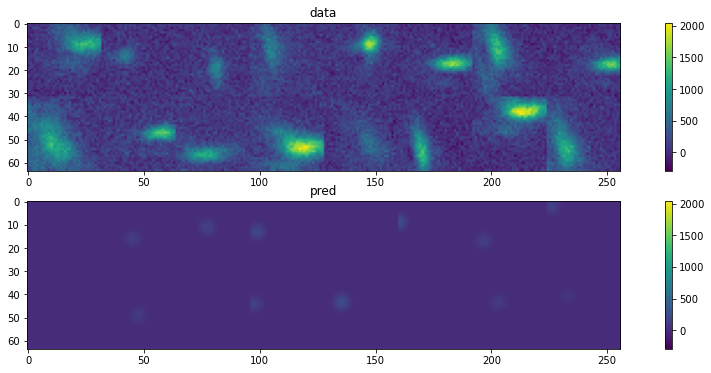

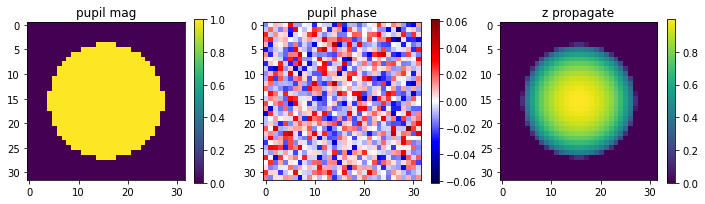

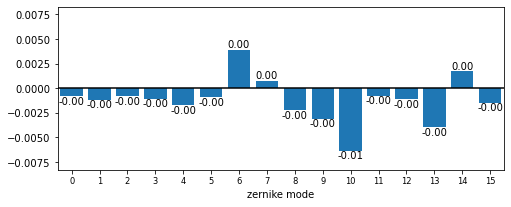

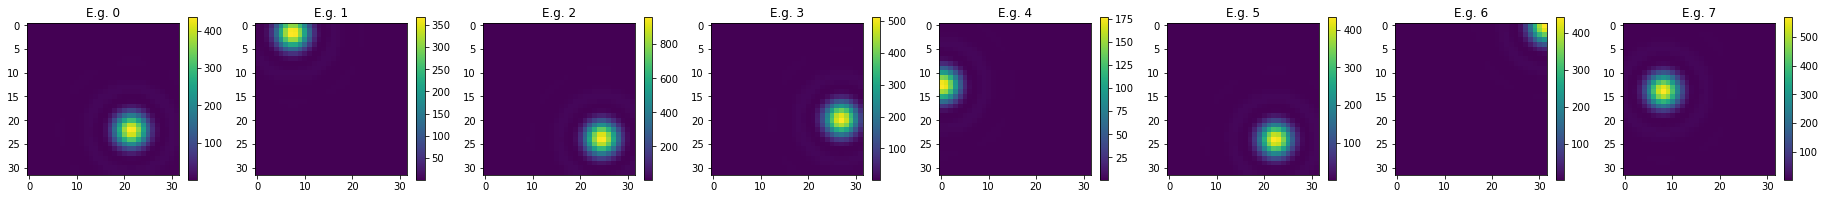

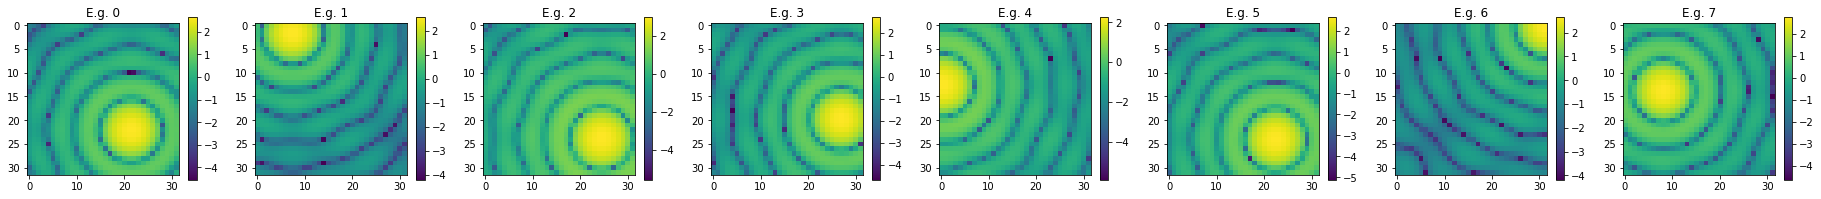

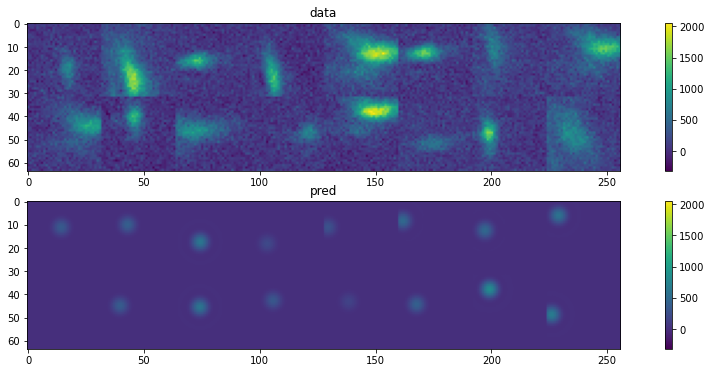

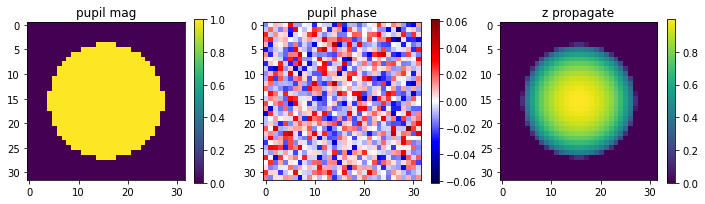

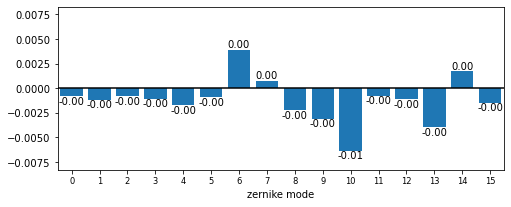

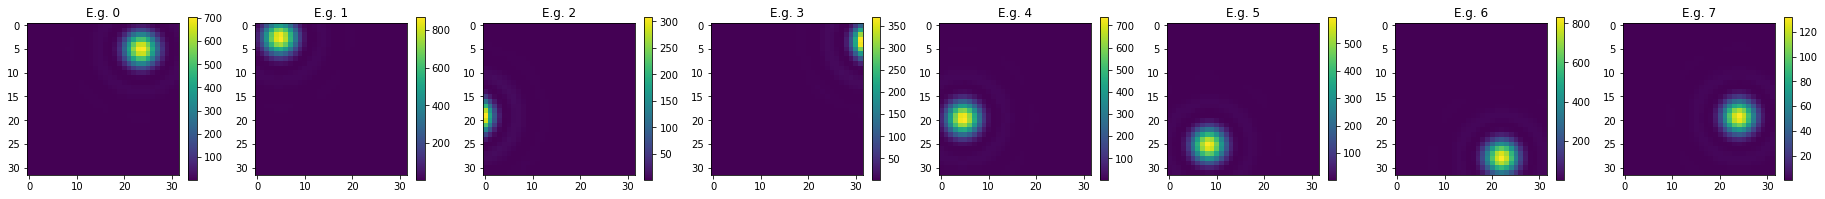

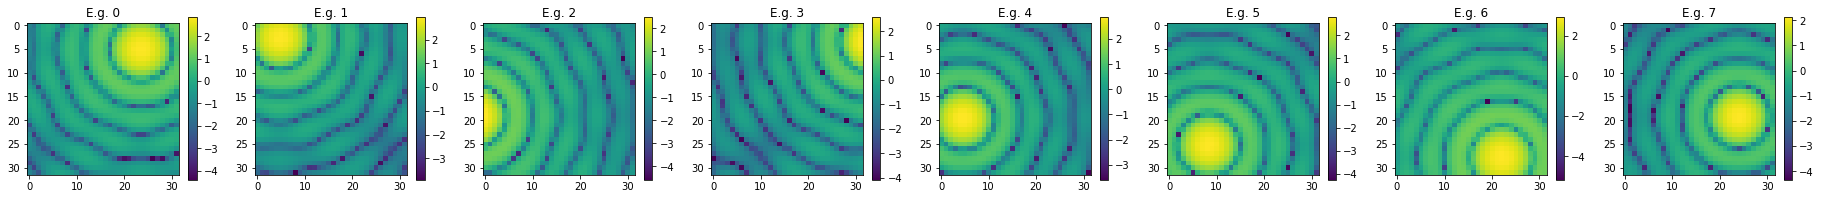

In [5]:
reload(trainer)
fitting_model = model.FourierOptics2DModel(fit_params=['x','y','A', ])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )